In [3]:
import pandas as pd
import sys
from DMS_utils import plot_positions_hm, plot_risk_hist, prepare_full_df, plot_dms_heatmap, export_colored_pdb
sys.path.append("../../")
from plots_interpretation import visualize_structure_continuous_color, create_plot_grid, plot_probs_along_seq

# Salmonella ParC/grlA

In [5]:
selected_gene = 'grlA'
selected_org = 'Salmonella'
protein_id = 'P26973'
wt = 'MSDMAERLALHEFTENAYLNYSMYVIMDRALPFIGDGLKPVQRRIVYAMSELGLNATAKFKKSARTVGDVLGKYHPHGDSACYEAMVLMAQPFSYRYPLVDGQGNWGAPDDPKSFAAMRYTESRLSKYAELLLSELGQGTADWVPNFDGTMQEPKMLPARLPNILLNGTTGIAVGMATDIPPHNLREVAKAAITLIEQPKTTLDQLLDIVQGPDYPTEAEIITPRAEIRKIYENGRGSVRMRAVWTKEDGAVVITALPHQVSGAKVLEQIAAQMRNKKLPMVDDLRDESDHENPTRLVIVPRSNRVDMEQVMNHLFATTDLEKSYRINLNMIGLDGRPAVKNLLEILTEWLAFRRDTVRRRLNYRLEKVLKRLHILEGLLVAFLNIDEVIEIIRNEDEPKPALMSRFGISETQAEAILELKLRHLAKLEEMKIRGEQDELEKERDQLQGILASERKMNTLLKKELQADSDAYGDDRRSPLREREEAKAMSEHDMLPSEPVTIVLSQMGWVRSAKGHDIDAPGLNYKAGDSFKAAVKGKSNQPVVFIDTTGRSYAIDPITLPSARGQGEPLTGKLTLPPGATVEHMLMEGDDQKLLMASDAGYGFVCTFNDLVARNRAGKALITLPENAHVMPPLVIEDEHDMLLAITQAGRMLMFPVDSLPQLSKGKGNKIINIPSAEAAKGDDGLAHLYVLPPQSTLTIHVGKRKIKLRPEELQKVVGERGRRGTLMRGLQRIDRIEIDSPHRVSHGDSEE'

preds_path = 'inputs/salmonella_grlA_dms_predict.csv'
original_data_path = 'inputs/combined_data_gene_filtered_allcols.csv'
pdb_folder = f'inputs/structure_files/'

In [6]:
full_data = prepare_full_df(preds_path, original_data_path, wt, selected_org, selected_gene, protein_id)

For Salmonella grlA:

Resistance mutations to: [nan 'Quinolone' 'quinolone']

N resistant mutations in original data: 8
Resistant mutations in original data: ['T57S', 'T66I', 'G78D', 'S80R', 'S80I', 'E84G', 'E84K', 'W106G']

N sensitive mutations in original data: 0
Sensitive mutations in original data: []

Prediction counts: binary_predictions
0    12130
1     2910
Name: count, dtype: int64


In [7]:
full_data.head()

,inputs,probabilities,binary_predictions,target_id,uniprot_id,organism,gene,protein_change,wt_aa,mt_aa,position,alphafold_position,label,tag,antibiotic_class,antibiotic_subclass,antibiotic_codes,antibiotic_standardised,wt_sequence,risk
0,"[-0.20777283608913422, -0.3970588445663452, -0...",0.035603,0,Salmonella.grlA.M1A,P26973,Salmonella,grlA,M1A,M,A,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MSDMAERLALHEFTENAYLNYSMYVIMDRALPFIGDGLKPVQRRIV...,Very Low
1,"[-0.20777283608913422, -0.3970588445663452, -0...",0.031446,0,Salmonella.grlA.M1R,P26973,Salmonella,grlA,M1R,M,R,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MSDMAERLALHEFTENAYLNYSMYVIMDRALPFIGDGLKPVQRRIV...,Very Low
2,"[-0.20777283608913422, -0.3970588445663452, -0...",0.034026,0,Salmonella.grlA.M1N,P26973,Salmonella,grlA,M1N,M,N,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MSDMAERLALHEFTENAYLNYSMYVIMDRALPFIGDGLKPVQRRIV...,Very Low
3,"[-0.20777283608913422, -0.3970588445663452, -0...",0.039464,0,Salmonella.grlA.M1D,P26973,Salmonella,grlA,M1D,M,D,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MSDMAERLALHEFTENAYLNYSMYVIMDRALPFIGDGLKPVQRRIV...,Very Low
4,"[-0.20777283608913422, -0.3970588445663452, -0...",0.049529,0,Salmonella.grlA.M1C,P26973,Salmonella,grlA,M1C,M,C,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MSDMAERLALHEFTENAYLNYSMYVIMDRALPFIGDGLKPVQRRIV...,Very Low


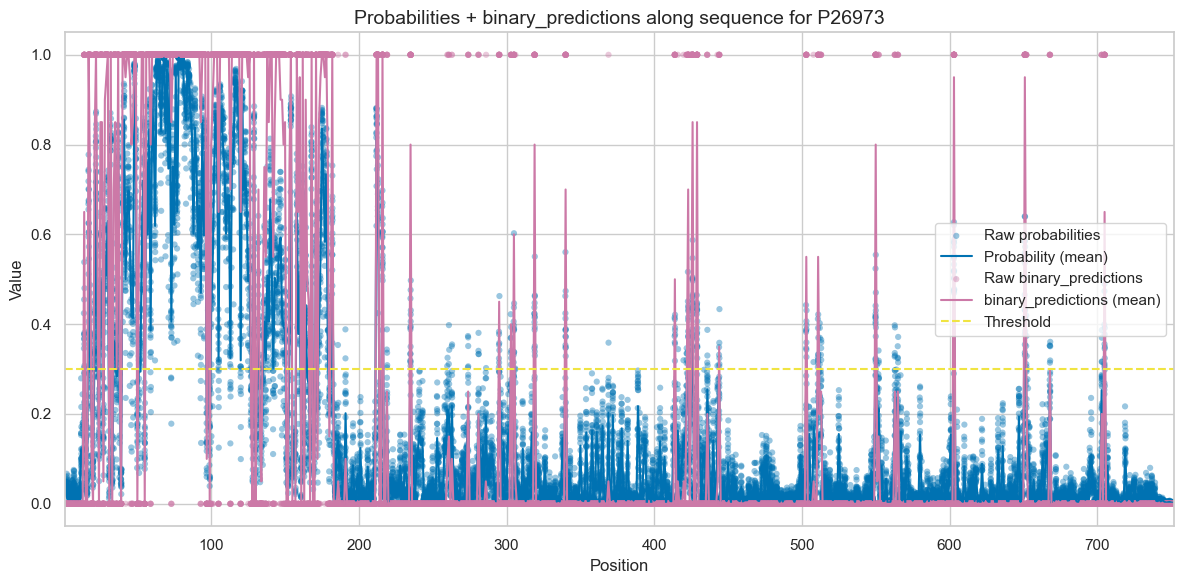

In [8]:
plot_probs_along_seq(full_data, protein_id, feature = 'binary_predictions',fill_missing=True) 

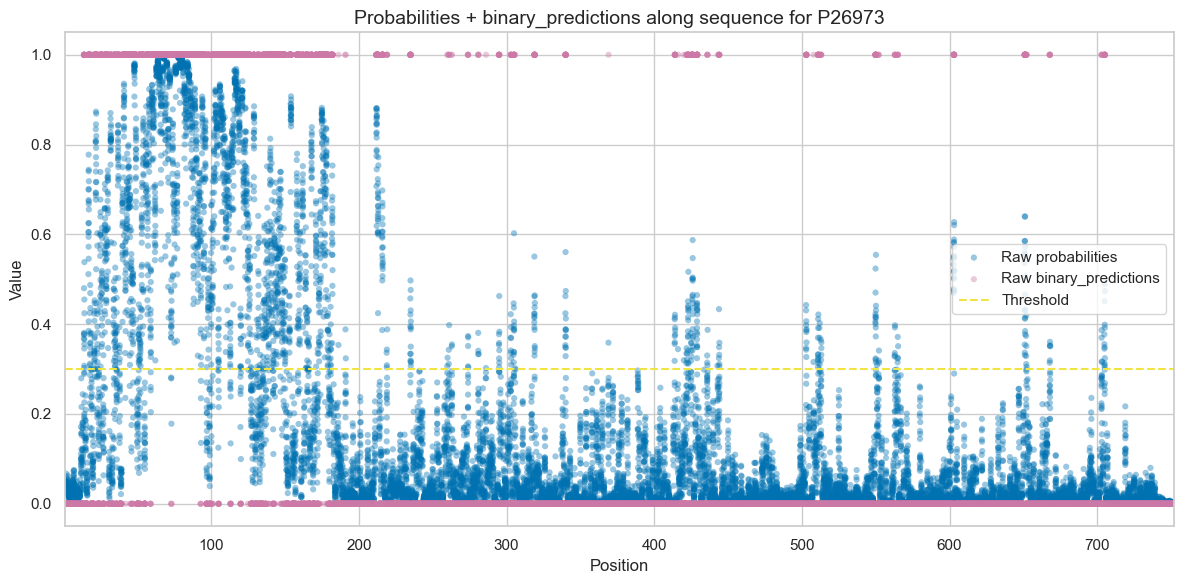

In [9]:
plot_probs_along_seq(full_data, protein_id, feature = 'binary_predictions',fill_missing=True, mode='points') 

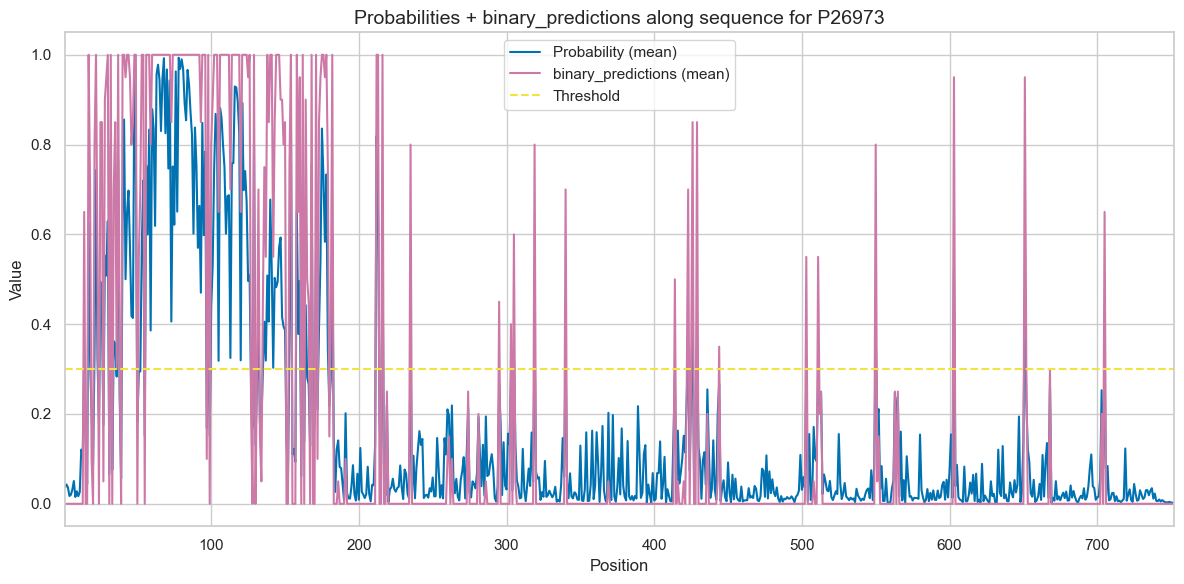

In [10]:
plot_probs_along_seq(full_data, protein_id, feature = 'binary_predictions',fill_missing=True, mode='lines') 

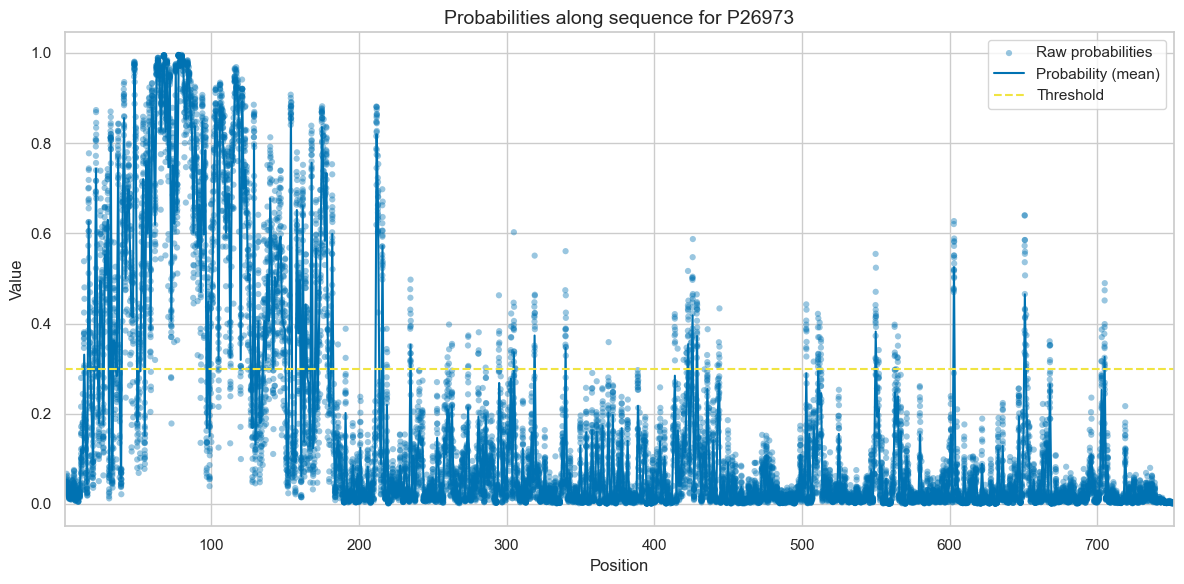

In [11]:
plot_probs_along_seq(full_data, protein_id, fill_missing=True)

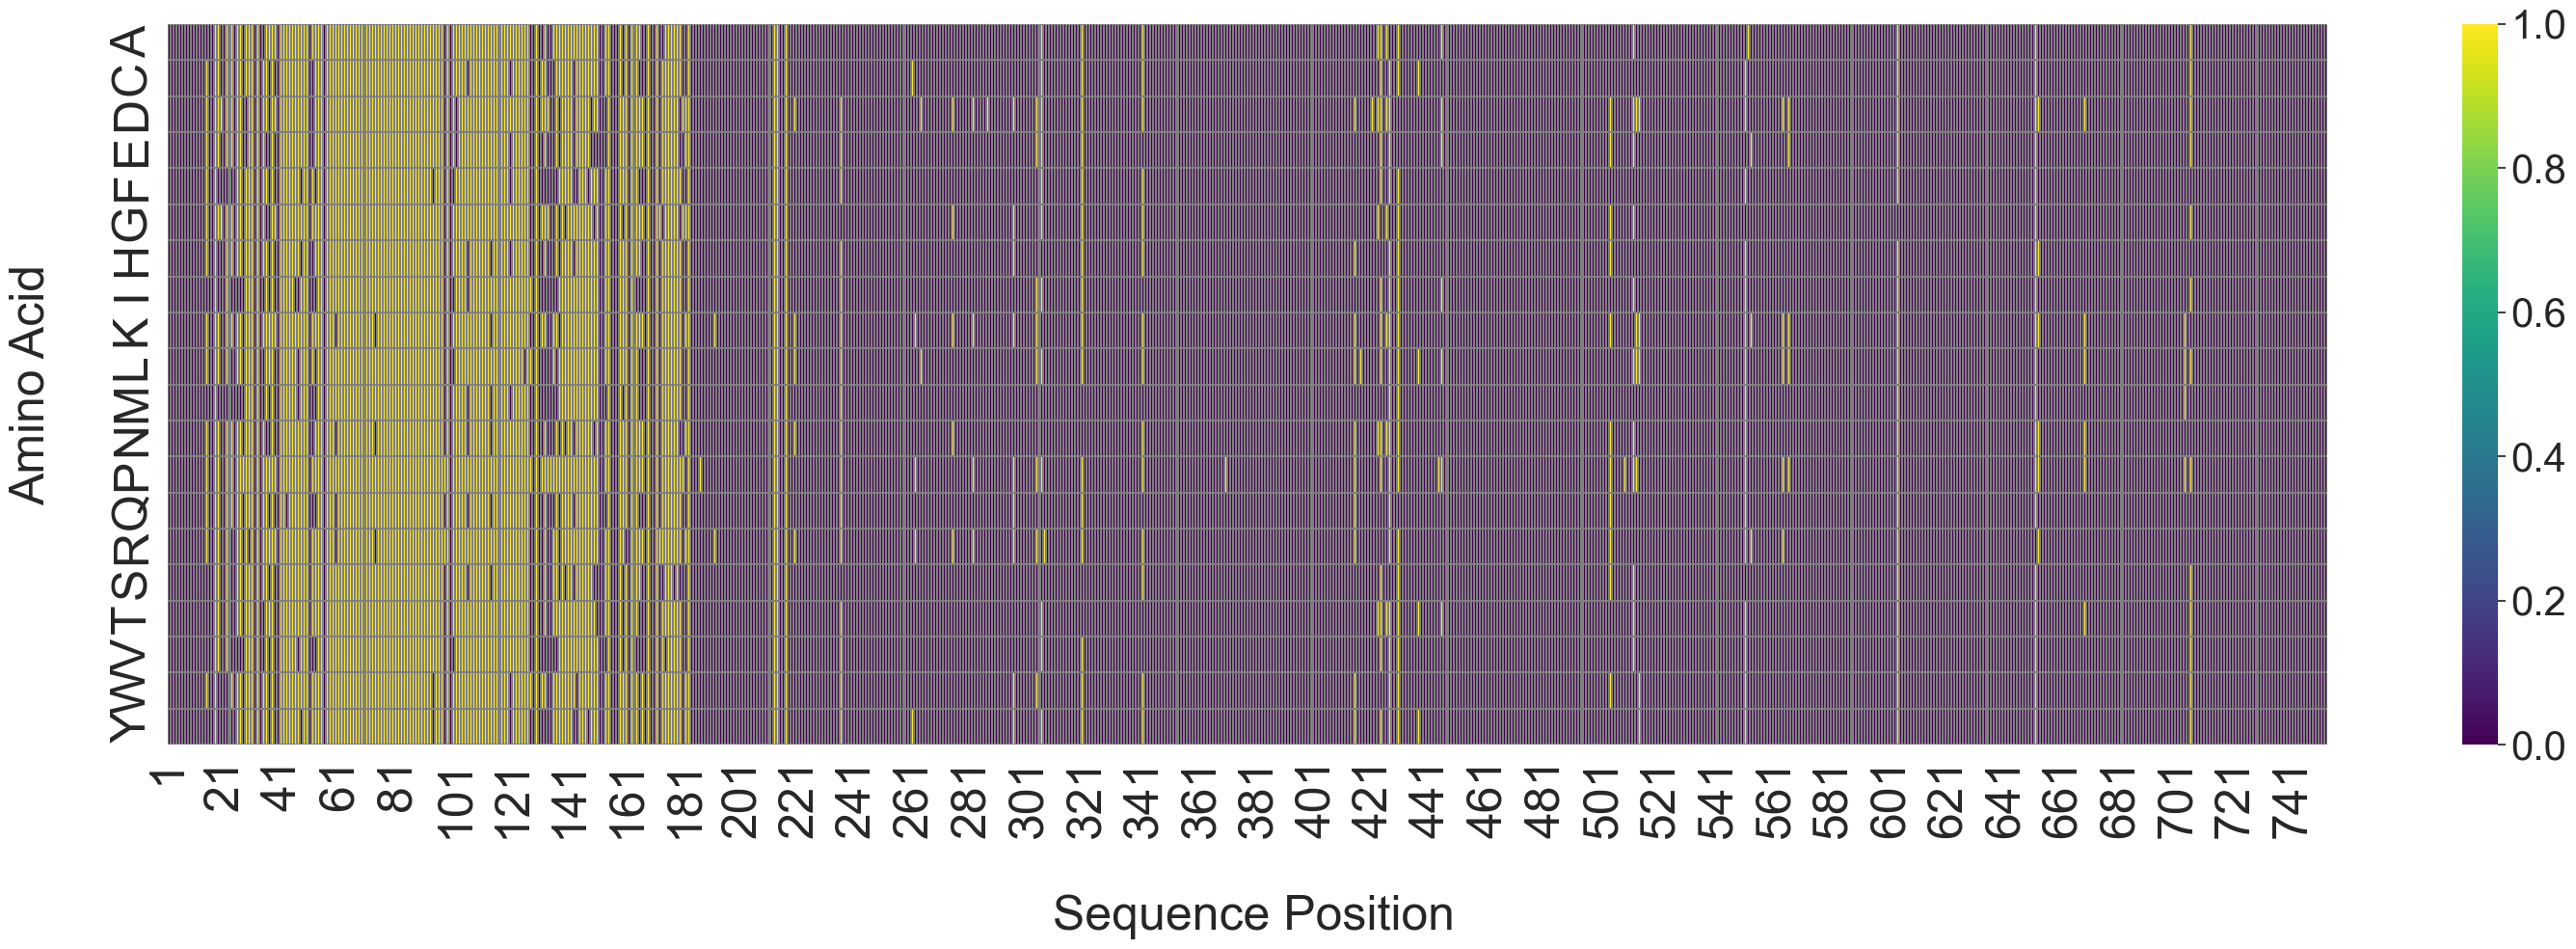

In [12]:
heatmap_df = plot_dms_heatmap(full_data, 'binary_predictions', selected_org, selected_gene)

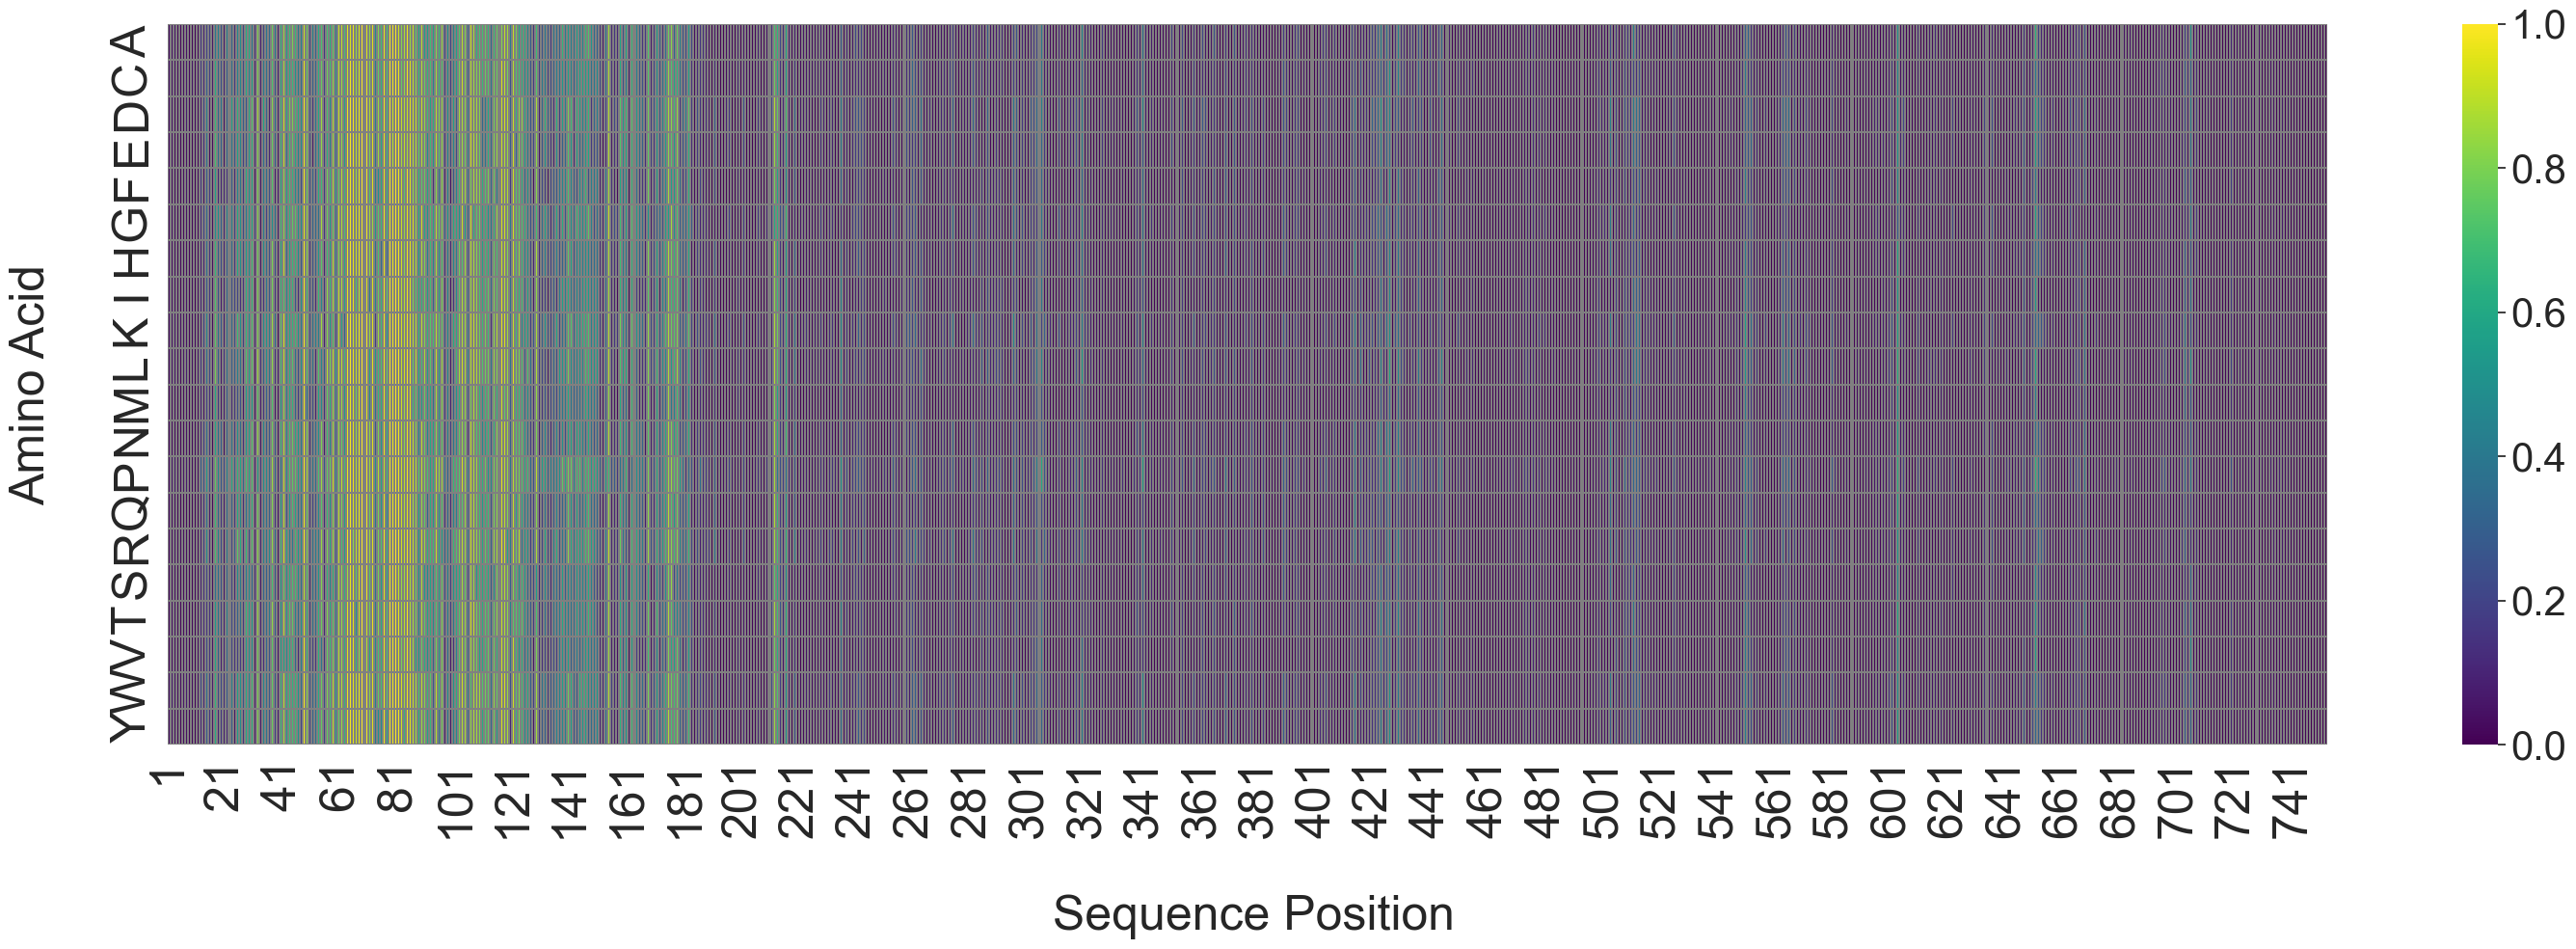

In [13]:
heatmap_df_probs = plot_dms_heatmap(full_data, 'probabilities', selected_org, selected_gene)

In [14]:
view = visualize_structure_continuous_color(pdb_file = f"{pdb_folder}{protein_id}.pdb", 
                                             value_df= full_data[full_data['uniprot_id']==protein_id], 
                                             value_col= 'probabilities',
                                             position_col = 'position', 
                                             chain= 'A',colormap= "viridis")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [15]:
export_colored_pdb(
    pdb_file=f"{pdb_folder}{protein_id}.pdb",
    value_df=full_data[full_data['uniprot_id']==protein_id],
    value_col="probabilities",
    position_col="position",
    chain="A",
    out_pdb=f"colored_{selected_org}_{selected_gene}.pdb"
)

Saved colored_Salmonella_grlA.pdb with values in B-factor column


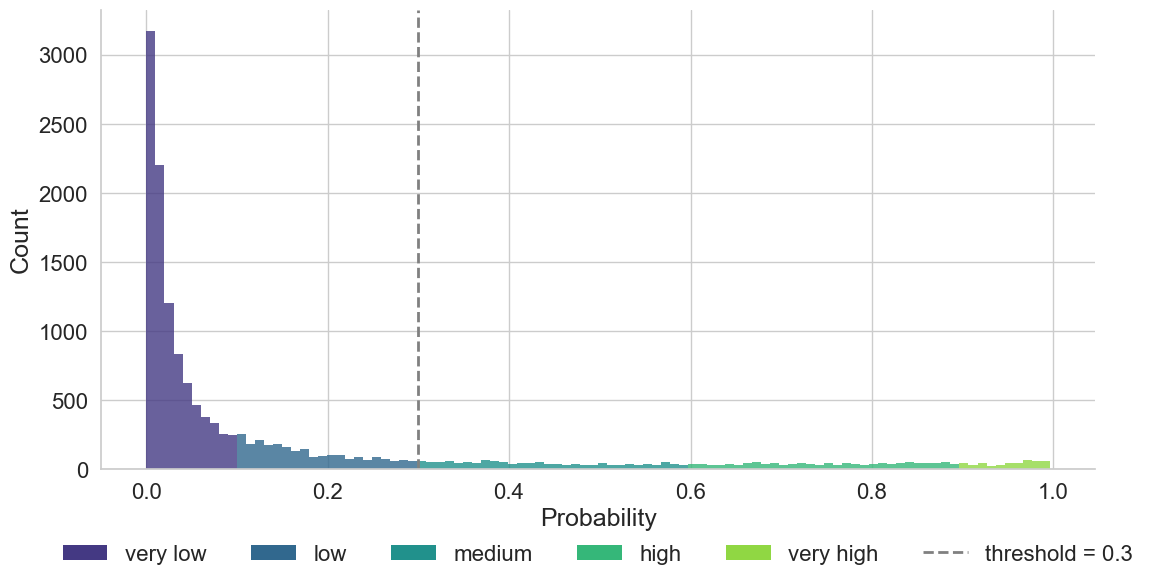

(<Figure size 1200x600 with 1 Axes>,
 <Axes: xlabel='Probability', ylabel='Count'>)

In [16]:
plot_risk_hist(
    full_data['probabilities'],
    selected_gene,
    selected_org,
    figsize=(12,6),
    cmap="viridis",
    alpha=0.8
)

In [17]:
full_data.risk.value_counts()/full_data.shape[0]*100

risk
Very Low     64.647606
Low          16.003989
Medium        8.530585
High          7.992021
Very High     2.825798
Name: count, dtype: float64

In [18]:
full_data.risk.value_counts()

risk
Very Low     9723
Low          2407
Medium       1283
High         1202
Very High     425
Name: count, dtype: int64

In [19]:
def plot_random_position_heatmap(risk_group, full_data, heatmap_df, wt, selected_org, selected_gene):
    position = list(full_data[(full_data['tag']!='original')&(full_data['risk']==risk_group)].sort_values(by='probabilities', ascending=False)['position'])[0]
    posititon_df = pd.DataFrame(heatmap_df[position])
    plot_positions_hm(posititon_df, risk_group, selected_org, selected_gene)
    print(f'Most likely resistant = {posititon_df.idxmax().item()}')
    wt_res = wt[posititon_df.columns.item()-1]
    print(f'WT residue = {wt_res}')
    wt_drop = posititon_df.drop(index=wt_res)
    print(f'Least likely resistant (not wt) = {wt_drop.idxmin().item()}')

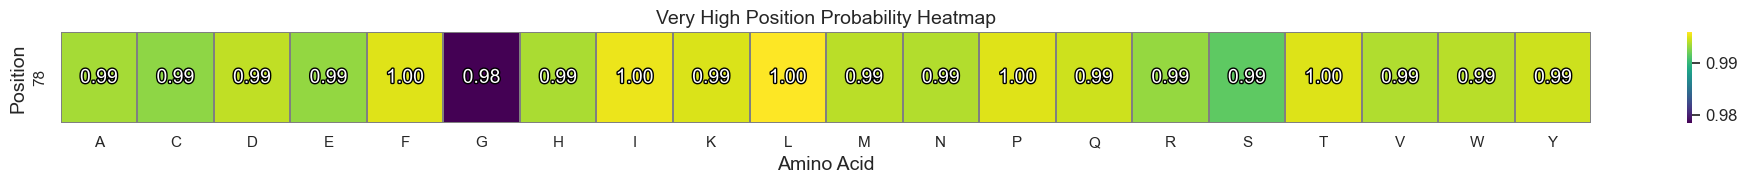

Most likely resistant = L
WT residue = G
Least likely resistant (not wt) = S


In [20]:
plot_random_position_heatmap('Very High', full_data, heatmap_df_probs, wt, selected_org, selected_gene)

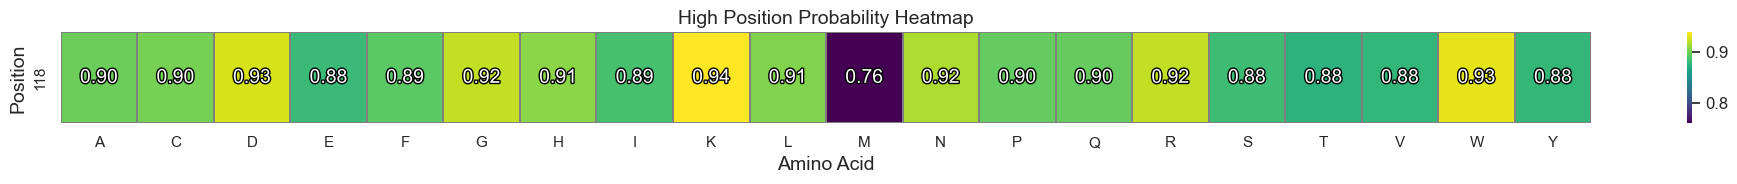

Most likely resistant = K
WT residue = M
Least likely resistant (not wt) = T


In [21]:
plot_random_position_heatmap('High', full_data, heatmap_df_probs, wt, selected_org, selected_gene)

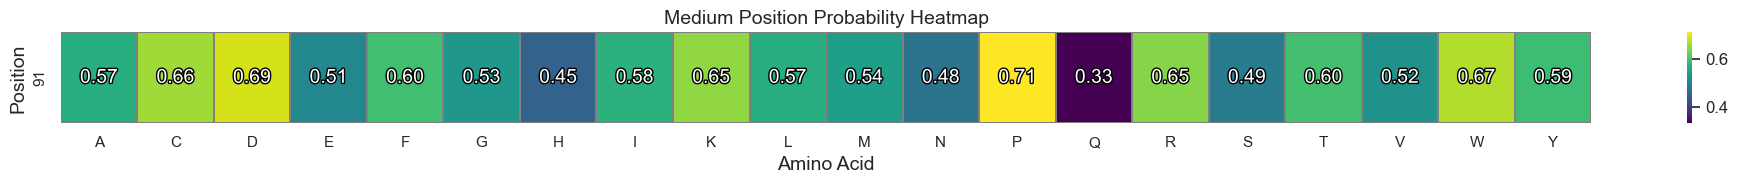

Most likely resistant = P
WT residue = Q
Least likely resistant (not wt) = H


In [22]:
plot_random_position_heatmap('Medium', full_data, heatmap_df_probs, wt, selected_org, selected_gene)

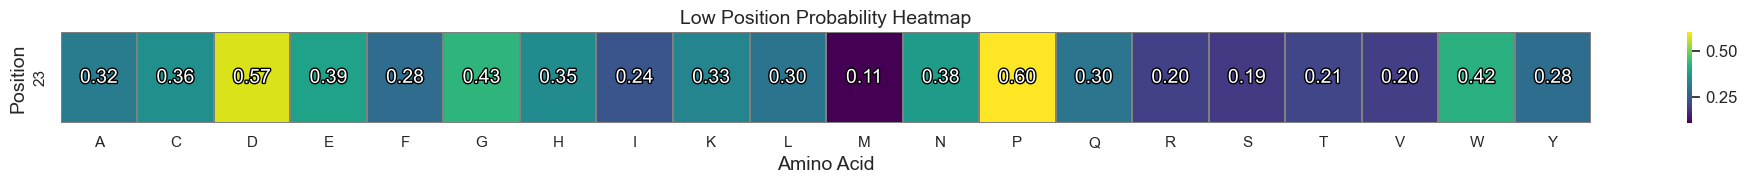

Most likely resistant = P
WT residue = M
Least likely resistant (not wt) = S


In [23]:
plot_random_position_heatmap('Low', full_data, heatmap_df_probs, wt, selected_org, selected_gene)

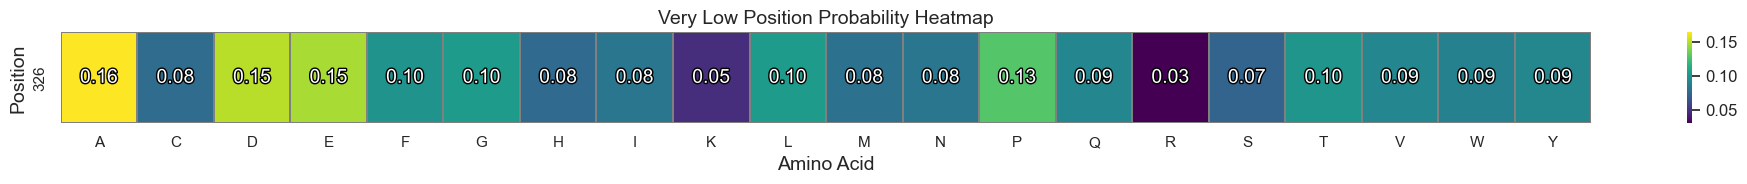

Most likely resistant = A
WT residue = R
Least likely resistant (not wt) = K


In [24]:
plot_random_position_heatmap('Very Low', full_data, heatmap_df_probs, wt, selected_org, selected_gene)